In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np  
import matplotlib as plt
import seaborn as sns
import random as random

In [2]:
food_france = pd.read_csv(r'C:\Users\Hugues\Box Sync\jupyter\cours\OCR_P3\food_france.csv')

In [3]:
food_france.describe(include = 'all' )

,Unnamed: 0,index,product_name,generic_name,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,17134.000000,17134.000000,17134,17134,17134,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000,17134.000000
unique,NaN,NaN,15499,13152,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Macédoine de légumes,Pâtes alimentaires au blé dur de qualité supér...,Conserves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,17,162,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8566.500000,45159.020077,NaN,NaN,NaN,1076.096885,11.559210,4.476444,30.152081,12.555072,2.610138,7.154580,0.898936,0.353910,6.544940,6.157056
std,4946.304092,24903.129513,NaN,NaN,NaN,758.380699,15.071351,7.068938,27.216358,17.381090,3.664045,6.593151,3.459779,1.362118,8.903855,9.162114
min,0.000000,15.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,4283.250000,24866.750000,NaN,NaN,NaN,390.000000,1.300000,0.300000,6.200000,1.300000,0.500000,2.200000,0.070000,0.027559,0.000000,-1.000000
50%,8566.500000,42299.500000,NaN,NaN,NaN,974.000000,5.500000,1.500000,18.000000,4.200000,1.800000,6.000000,0.508000,0.200000,5.000000,3.000000
75%,12849.750000,62475.500000,NaN,NaN,NaN,1642.750000,17.500000,5.700000,56.500000,16.700000,3.400000,9.800000,1.100000,0.433071,13.000000,14.000000


In [4]:
food_france.isna().any().describe()

count        16
unique        1
top       False
freq         16
dtype: object

In [5]:
(food_france.isna().sum(axis = 0)).sort_values()

Unnamed: 0                 0
index                      0
product_name               0
generic_name               0
main_category_fr           0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
nutrition-score-uk_100g    0
dtype: int64

In [6]:
food_france.drop('Unnamed: 0', axis = 1, inplace = True )

In [7]:
food_france.drop('index', axis = 1, inplace = True )
food_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17134 entries, 0 to 17133
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             17134 non-null  object 
 1   generic_name             17134 non-null  object 
 2   main_category_fr         17134 non-null  object 
 3   energy_100g              17134 non-null  float64
 4   fat_100g                 17134 non-null  float64
 5   saturated-fat_100g       17134 non-null  float64
 6   carbohydrates_100g       17134 non-null  float64
 7   sugars_100g              17134 non-null  float64
 8   fiber_100g               17134 non-null  float64
 9   proteins_100g            17134 non-null  float64
 10  salt_100g                17134 non-null  float64
 11  sodium_100g              17134 non-null  float64
 12  nutrition-score-fr_100g  17134 non-null  float64
 13  nutrition-score-uk_100g  17134 non-null  float64
dtypes: float64(11), object

In [8]:
food_france['total_nutriment']= food_france['proteins_100g']+food_france['carbohydrates_100g']+food_france['fat_100g']

In [9]:
row_to_drop = food_france[food_france['total_nutriment']>100].index.tolist()
food_france.drop(row_to_drop , axis = 0, inplace = True)

In [10]:
col_w_100g = list (filter( lambda info : "100g" in info , food_france.columns.tolist() )  )

In [11]:
col_ana = ['product_name' ,'generic_name', 'main_category_fr']+col_w_100g

In [12]:
food_france[col_ana]

,product_name,generic_name,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,Sodas,177.0,0.0,0.00,10.40,10.40,0.000,0.00,0.0254,0.010000,13.0,2.0
1,Cakes Raisins,Pâtisseries aux raisins secs.,Gâteaux,1768.0,19.0,2.50,56.00,28.00,1.800,5.80,0.6500,0.255906,13.0,13.0
2,Cakes aux Fruits,Pâtisseries aux fruits confits et aux raisins ...,Pâtisseries,1670.0,15.0,2.00,60.00,34.00,1.500,4.90,0.6000,0.236220,12.0,12.0
3,Financiers aux Amandes,Pâtisseries fondantes à la poudre d'amande.,Pâtisseries,1868.0,23.0,10.00,51.00,39.00,1.700,8.00,0.5500,0.216535,22.0,22.0
4,Fondants Citron,Pâtisseries fondantes à la poudre d’amande et ...,Pâtisseries,1896.0,24.0,10.00,50.00,37.00,2.500,8.10,0.7800,0.307087,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17129,Mantou Sandwich,Petits sandwiches orientaux,Pains,1218.0,2.0,1.00,60.00,14.00,0.300,8.00,0.0600,0.023622,2.0,2.0
17130,Mini Paratha,Pain indien feuilleté précuit surgelé,Pains,1309.0,15.0,9.00,41.40,5.10,6.500,6.00,0.9000,0.354331,10.0,10.0
17131,100% Pur Jus 4 agrumes,Jus 4 agrumes,Jus de fruits,192.0,0.5,0.00,10.20,9.20,0.600,0.60,0.0300,0.011811,4.0,-3.0
17132,Spearmint sans sucres,Pastilles avec chlorophylle au gout menthe ave...,Bonbons,1017.0,1.3,1.28,95.87,0.12,0.005,0.04,0.0050,0.001969,4.0,4.0


In [13]:
def print_random(df,x):
    random_numbers = [random.randint(0, df.shape[0]) for x in range(x)]
    random_numbers.sort()
    df.loc[random_numbers,col_ana] 
    return df.loc[random_numbers,col_ana] 

In [14]:
print_random(food_france,10)

,product_name,generic_name,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
261,Confiture de griottes,Confiture extra de griottes,Confitures,1018.0,0.1,0.1,58.0,51.0,0.9,0.5,0.0254,0.010000,11.0,11.0
1899,Myrtilles sauvages,Confiture Extra Myrtilles sauvages,Confitures,1024.0,0.1,0.0,59.0,59.0,1.5,0.3,0.0000,0.000000,10.0,10.0
2135,Macédoine de légumes,Macédoine de légumes,Aliments et boissons à base de végétaux,161.0,0.3,0.1,4.9,0.8,3.7,2.2,0.8000,0.314961,-8.0,-8.0
6595,Sans sucres ajoutés Pomme Framboise,Spécialité de pommes et de framboises sans suc...,Desserts,241.0,0.5,0.2,11.7,10.7,1.7,0.5,0.0100,0.003937,-5.0,-5.0
8866,Cuisse de Canette pommes de terre et champignons,Cuisse de Canette pommes de terre et champignons,Plats à base de viande,779.0,10.0,1.4,12.0,1.3,2.3,11.0,0.6800,0.267717,-3.0,-3.0
11057,Wasabi,Sauce condimentaire à base de poudre de wasabi,Epicerie,907.0,12.0,0.8,23.0,7.4,1.8,6.8,0.7000,0.275591,0.0,0.0
11766,Haricots verts extra-fins,Haricots verts,Surgelés,134.0,0.1,0.1,4.4,1.1,3.3,1.7,0.0200,0.007874,-10.0,-10.0
13134,Ravioli 6 Légumes,Ravioli 6 légumes,Pâtes alimentaires,360.0,1.4,0.2,14.0,2.8,2.2,3.1,0.8500,0.334646,0.0,0.0
13577,P'tit Dros Pomme Nature,Compote de pommes allégée en sucres (30 % de s...,Desserts,265.0,0.2,0.0,14.0,14.0,2.0,0.2,0.0000,0.000000,-4.0,-4.0
14379,Gnudi Ricotta Épinards Frais,Pâtes fraîches à la ricotta et aux épinards,Pâtes alimentaires,682.0,7.3,4.7,12.3,1.3,4.0,10.0,1.8000,0.708661,8.0,8.0


In [15]:
food_france

,product_name,generic_name,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,total_nutriment
0,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,Sodas,177.0,0.0,0.00,10.40,10.40,0.000,0.00,0.0254,0.010000,13.0,2.0,10.40
1,Cakes Raisins,Pâtisseries aux raisins secs.,Gâteaux,1768.0,19.0,2.50,56.00,28.00,1.800,5.80,0.6500,0.255906,13.0,13.0,80.80
2,Cakes aux Fruits,Pâtisseries aux fruits confits et aux raisins ...,Pâtisseries,1670.0,15.0,2.00,60.00,34.00,1.500,4.90,0.6000,0.236220,12.0,12.0,79.90
3,Financiers aux Amandes,Pâtisseries fondantes à la poudre d'amande.,Pâtisseries,1868.0,23.0,10.00,51.00,39.00,1.700,8.00,0.5500,0.216535,22.0,22.0,82.00
4,Fondants Citron,Pâtisseries fondantes à la poudre d’amande et ...,Pâtisseries,1896.0,24.0,10.00,50.00,37.00,2.500,8.10,0.7800,0.307087,22.0,22.0,82.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17129,Mantou Sandwich,Petits sandwiches orientaux,Pains,1218.0,2.0,1.00,60.00,14.00,0.300,8.00,0.0600,0.023622,2.0,2.0,70.00
17130,Mini Paratha,Pain indien feuilleté précuit surgelé,Pains,1309.0,15.0,9.00,41.40,5.10,6.500,6.00,0.9000,0.354331,10.0,10.0,62.40
17131,100% Pur Jus 4 agrumes,Jus 4 agrumes,Jus de fruits,192.0,0.5,0.00,10.20,9.20,0.600,0.60,0.0300,0.011811,4.0,-3.0,11.30
17132,Spearmint sans sucres,Pastilles avec chlorophylle au gout menthe ave...,Bonbons,1017.0,1.3,1.28,95.87,0.12,0.005,0.04,0.0050,0.001969,4.0,4.0,97.21


<AxesSubplot:xlabel='fat_100g', ylabel='Count'>

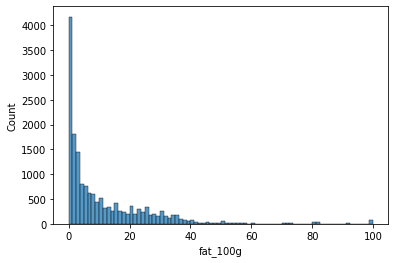

In [16]:
sns.histplot(data=food_france, x="fat_100g")

<AxesSubplot:xlabel='fat_100g'>

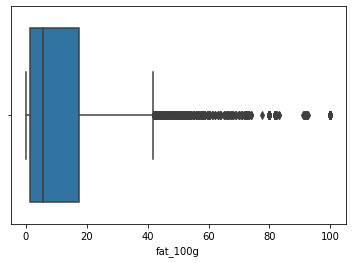

In [17]:
sns.boxplot(data=food_france, x="fat_100g")

<AxesSubplot:xlabel='carbohydrates_100g'>

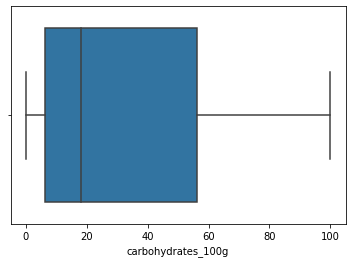

In [18]:
sns.boxplot(data=food_france, x="carbohydrates_100g")

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

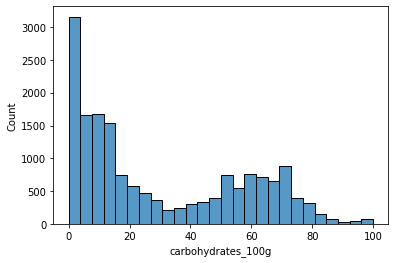

In [19]:
sns.histplot(data=food_france, x="carbohydrates_100g")

<AxesSubplot:xlabel='proteins_100g'>

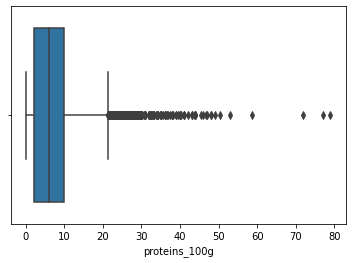

In [20]:
sns.boxplot(data=food_france, x="proteins_100g")

<AxesSubplot:xlabel='proteins_100g', ylabel='Count'>

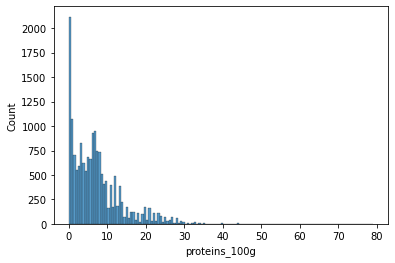

In [21]:
sns.histplot(data=food_france, x="proteins_100g")

<AxesSubplot:xlabel='energy_100g', ylabel='Count'>

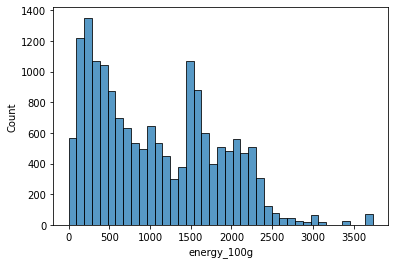

In [22]:
sns.histplot(data=food_france, x="energy_100g")

<AxesSubplot:xlabel='energy_100g'>

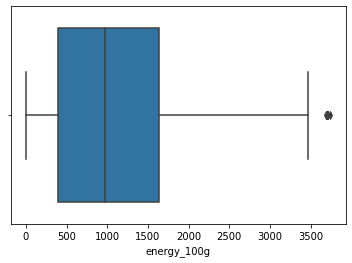

In [23]:
sns.boxplot(data=food_france, x="energy_100g")

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

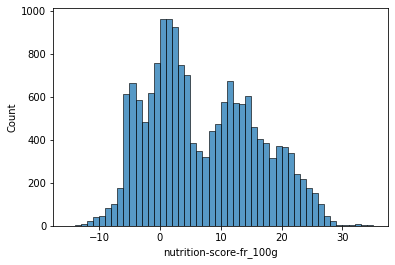

In [24]:
sns.histplot(data=food_france, x="nutrition-score-fr_100g")

<AxesSubplot:xlabel='nutrition-score-uk_100g', ylabel='Count'>

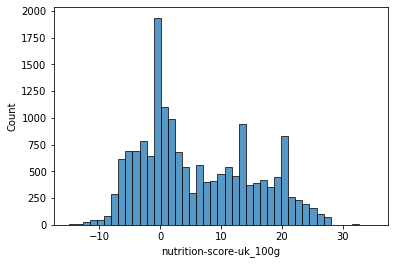

In [25]:
sns.histplot(data=food_france, x="nutrition-score-uk_100g")

<AxesSubplot:xlabel='fat_100g', ylabel='nutrition-score-fr_100g'>

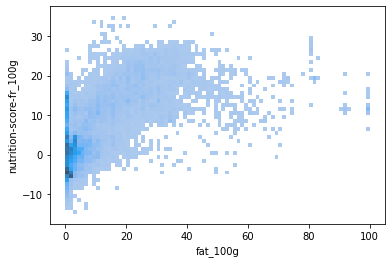

In [26]:
sns.histplot(data=food_france, y="nutrition-score-fr_100g", x = 'fat_100g')

<AxesSubplot:xlabel='fat_100g', ylabel='nutrition-score-uk_100g'>

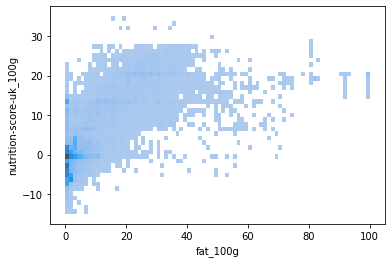

In [27]:
sns.histplot(data=food_france, y="nutrition-score-uk_100g", x = 'fat_100g')

<AxesSubplot:xlabel='sugars_100g', ylabel='nutrition-score-fr_100g'>

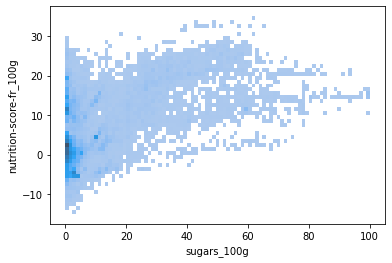

In [28]:
sns.histplot(data=food_france, y="nutrition-score-fr_100g", x = 'sugars_100g')

<AxesSubplot:xlabel='sugars_100g', ylabel='nutrition-score-uk_100g'>

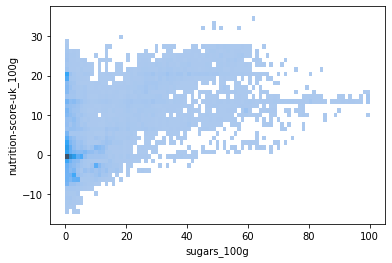

In [29]:
sns.histplot(data=food_france, y="nutrition-score-uk_100g", x = 'sugars_100g')

In [30]:
info_pourcentage =  col_w_100g
info_pourcentage.remove('energy_100g')
print (info_pourcentage)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


<AxesSubplot:>

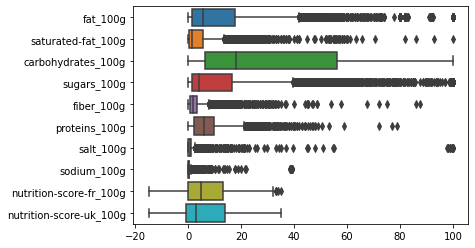

In [31]:
sns.boxplot(data=food_france[info_pourcentage], orient = 'h')

<AxesSubplot:>

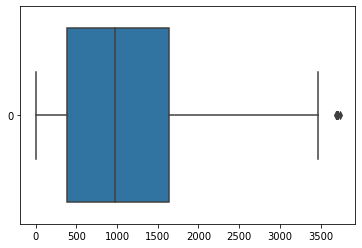

In [32]:
sns.boxplot(data=food_france['energy_100g'], orient = 'h')

In [33]:
count_category =food_france['main_category_fr'].value_counts()
count_category[count_category>100].sum()
print ( 'les 100 premières valeurs représentent ',count_category[count_category>100].sum() / count_category.sum() ,' du total ')
count_category.describe()

les 100 premières valeurs représentent  0.7587980825441366  du total 


count    478.000000
mean      35.786611
std      106.930690
min        1.000000
25%        1.000000
50%        1.000000
75%        9.750000
max      722.000000
Name: main_category_fr, dtype: float64

[Text(0.5, 1.0, "Nombre de catégorie en fonction du nombre d'aliments référencés ")]

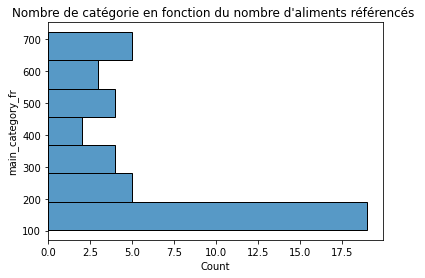

In [34]:
sns.histplot(data=count_category, y=count_category[count_category>100]).set(title='Nombre de catégorie en fonction du nombre d\'aliments référencés ')

In [35]:
count_category.head()

Conserves          722
Biscuits           698
Surgelés           693
Petit-déjeuners    685
Desserts           637
Name: main_category_fr, dtype: int64

<AxesSubplot:ylabel='main_category_fr'>

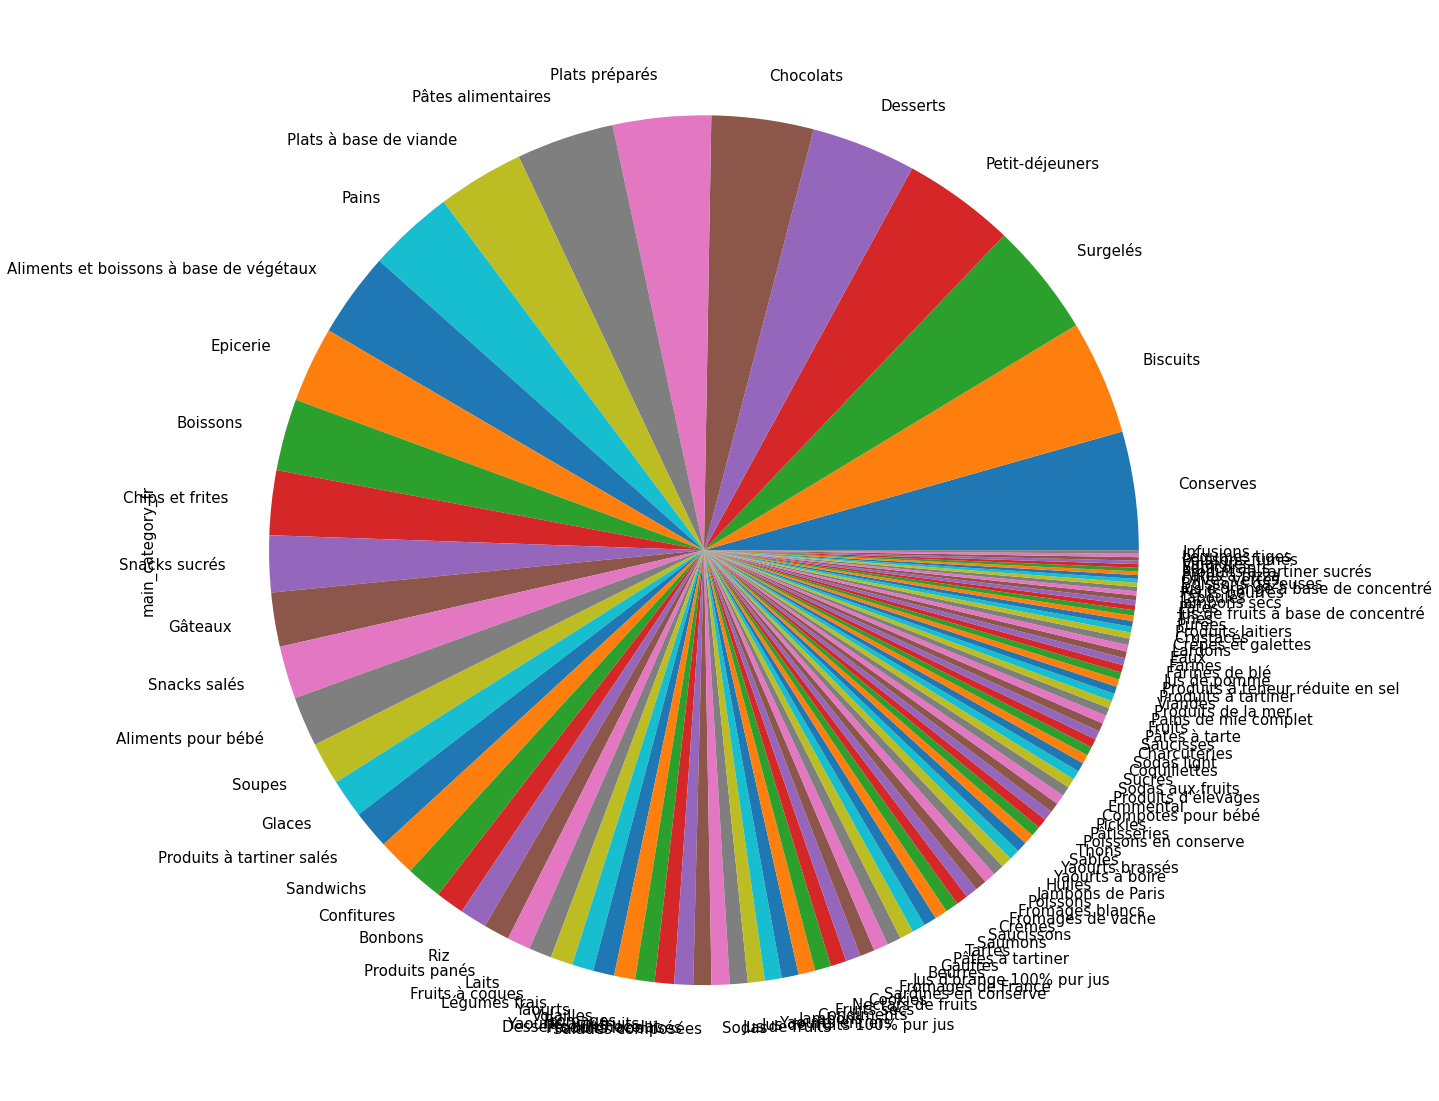

In [36]:
# Diagramme en secteurs
plt.rcParams.update({'font.size': 15}) 
count_category[count_category>20].plot(kind='pie', figsize= ( 20,20), fontsize=15)





In [37]:
# Diagramme en tuyaux
count_category[count_category>20].plot(kind='barh' , figsize = (100,150), fontsize= 50 )


<AxesSubplot:>

<AxesSubplot:xlabel='main_category_fr'>

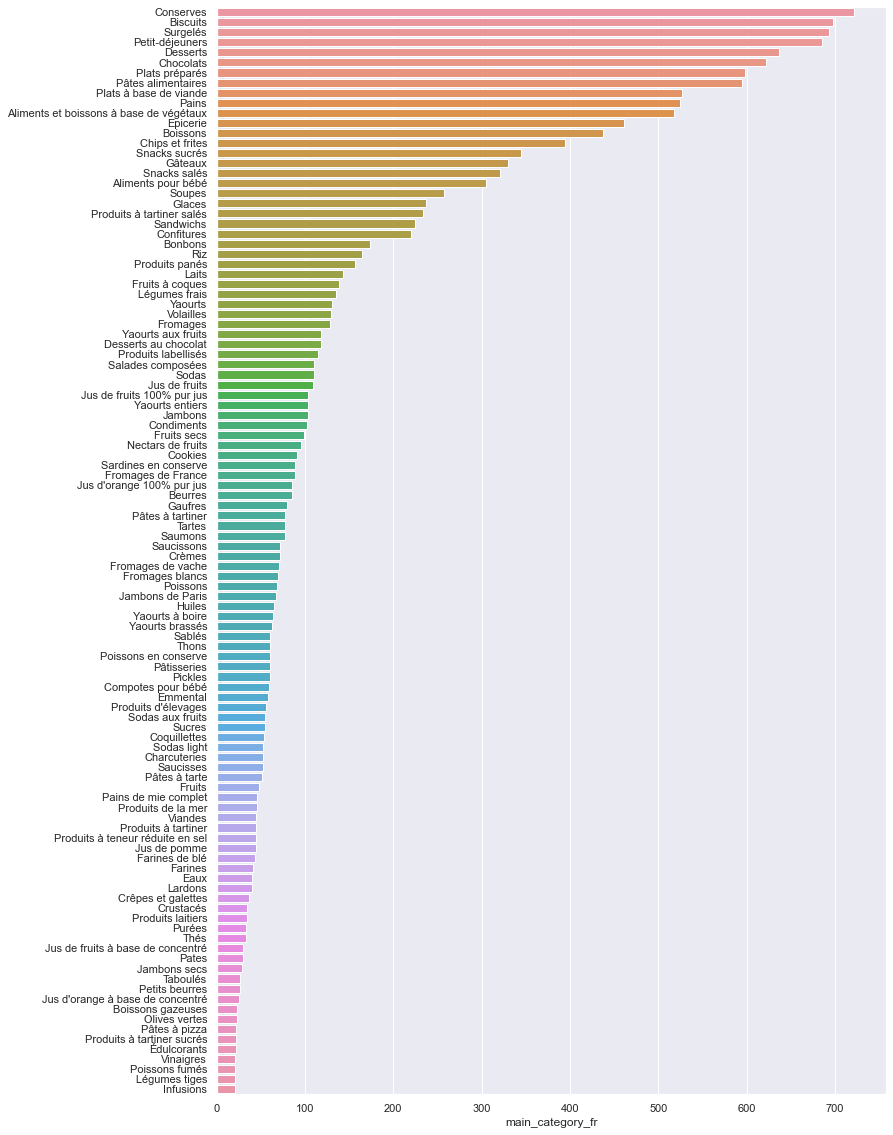

In [38]:


plt.rcParams.update({'font.size': 8}) 
sns.set(rc={"figure.figsize":(12, 20)}) #width, #height=
sns.barplot(y = count_category[count_category>20].index, x = count_category[count_category>20], orient ='h') 




<AxesSubplot:xlabel='fat_100g', ylabel='energy_100g'>

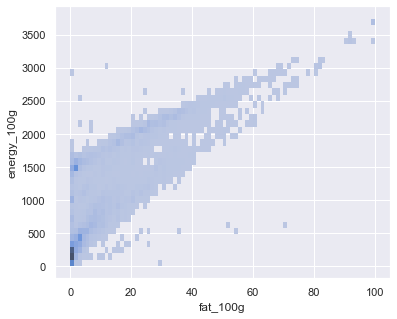

In [39]:
sns.set(rc={"figure.figsize":(6, 5)})#width, #height=
sns.histplot(data=food_france, x="fat_100g", y = 'energy_100g')

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='energy_100g'>

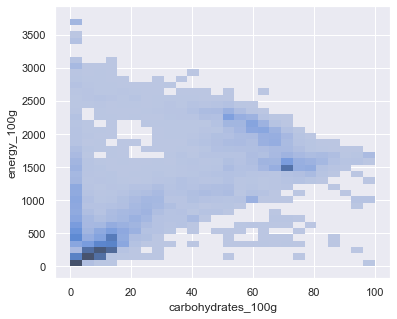

In [40]:
sns.set(rc={"figure.figsize":(6, 5)})#width, #height=
sns.histplot(data=food_france, x="carbohydrates_100g", y = 'energy_100g')

<AxesSubplot:xlabel='proteins_100g', ylabel='energy_100g'>

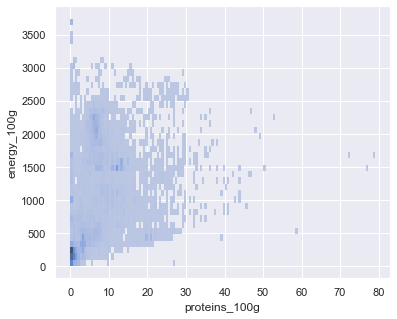

In [41]:
sns.set(rc={"figure.figsize":(6, 5)})#width, #height=
sns.histplot(data=food_france, x="proteins_100g", y = 'energy_100g')

<AxesSubplot:xlabel='total_nutriment', ylabel='energy_100g'>

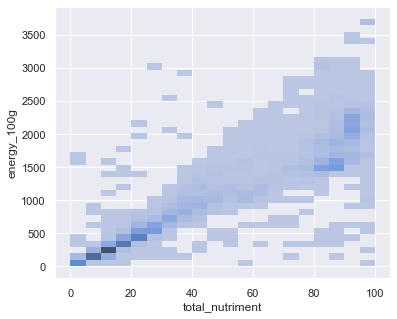

In [42]:

sns.set(rc={"figure.figsize":(6, 5)})#width, #height=
sns.histplot(data=food_france, x="total_nutriment", y = 'energy_100g')

In [43]:
food_france[food_france['main_category_fr'] =='Conserves'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 25 to 17120
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             722 non-null    object 
 1   generic_name             722 non-null    object 
 2   main_category_fr         722 non-null    object 
 3   energy_100g              722 non-null    float64
 4   fat_100g                 722 non-null    float64
 5   saturated-fat_100g       722 non-null    float64
 6   carbohydrates_100g       722 non-null    float64
 7   sugars_100g              722 non-null    float64
 8   fiber_100g               722 non-null    float64
 9   proteins_100g            722 non-null    float64
 10  salt_100g                722 non-null    float64
 11  sodium_100g              722 non-null    float64
 12  nutrition-score-fr_100g  722 non-null    float64
 13  nutrition-score-uk_100g  722 non-null    float64
 14  total_nutriment        

In [44]:
count_category =food_france['main_category_fr'].value_counts()
# count_category.to_csv('category.csv')

In [45]:
food_france_main_cat=food_france[food_france['main_category_fr'].isin(count_category[count_category>500].index)]
food_france_main_cat.to_csv("food_france_main_cat.csv")

In [46]:
food_france_main_cat.describe(include = 'all')

,product_name,generic_name,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,total_nutriment
count,6820,6820,6820,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.00000,6820.000000
unique,6205,5243,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Macédoine de légumes,Pâtes alimentaires au blé dur de qualité supér...,Conserves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,143,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1156.446609,9.856675,4.443303,37.980240,13.541393,3.745414,7.243071,0.598712,0.235711,4.703519,4.66437,55.079986
std,NaN,NaN,NaN,710.586686,11.002532,6.353338,26.537432,16.537598,3.747332,4.570731,0.591009,0.232678,9.776701,9.76085,32.803837
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.00000,1.400000
25%,NaN,NaN,NaN,476.000000,1.900000,0.400000,12.400000,2.000000,1.700000,4.300000,0.100000,0.039370,-3.000000,-3.00000,22.175000
50%,NaN,NaN,NaN,1155.000000,5.400000,1.400000,35.950000,4.500000,2.800000,6.900000,0.550000,0.216535,2.000000,2.00000,58.100000
75%,NaN,NaN,NaN,1715.000000,14.800000,5.400000,64.000000,22.000000,4.500000,9.500000,0.908250,0.357610,12.000000,12.00000,87.800000


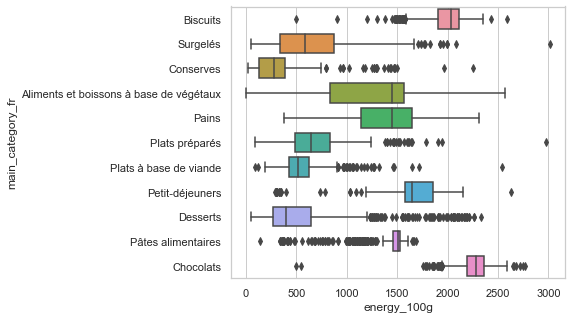

In [47]:
sns.set_style("whitegrid")

box_plot = sns.boxplot(y="main_category_fr",x="energy_100g",data=food_france_main_cat, orient = 'h')

#medians = tips.groupby(['day'])['total_bill'].median()
#vertical_offset = tips['total_bill'].median() * 0.05 # offset from median for display

#for xtick in box_plot.get_xticks():
#    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')

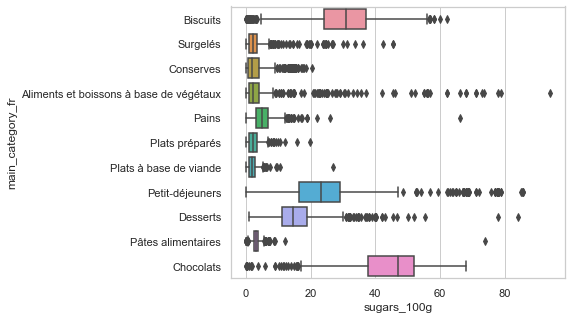

In [48]:
box_plot = sns.boxplot(y="main_category_fr",x="sugars_100g",data=food_france_main_cat, orient = 'h')

In [49]:
x = food_france_main_cat['main_category_fr' ] # qualitative
y = food_france_main_cat['energy_100g']# quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
            'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE , SCT , SCE/SCT
    
    
eta_squared(food_france_main_cat['main_category_fr'],food_france_main_cat['energy_100g'])

(2718139182.4468317, 3443141118.508933, 0.7894358926606916)

In [50]:
import pingouin as pg

aov = pg.anova(data=food_france_main_cat, dv='energy_100g', between='main_category_fr', detailed=True)
print(aov)

             Source            SS    DF            MS           F  p-unc  \
0  main_category_fr  2.718139e+09    10  2.718139e+08  2552.79452    0.0   
1            Within  7.250019e+08  6809  1.064770e+05         NaN    NaN   

        np2  
0  0.789436  
1       NaN  


C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


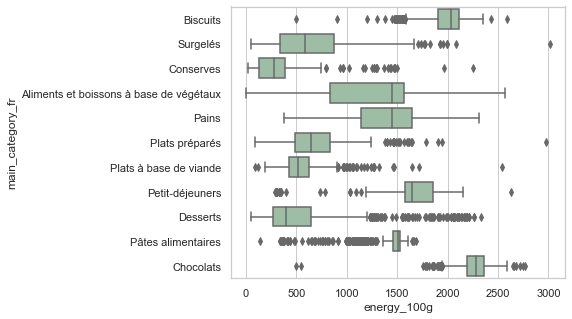

In [51]:
import statsmodels.api as sm 
from statsmodels.regression.linear_model import OLS 
import matplotlib.pyplot as plt


ax = sns.boxplot(y='main_category_fr', x='energy_100g', data=food_france_main_cat, color='#99c2a2', orient='h')
#ax = sns.swarmplot(x="main_category_fr", y="energy_100g", data=food_france_main_cat, color='#7d0013')


In [52]:
#ax = sns.swarmplot(x="main_category_fr", y="energy_100g", data=food_france_main_cat, color='#7d0013', orient='h')

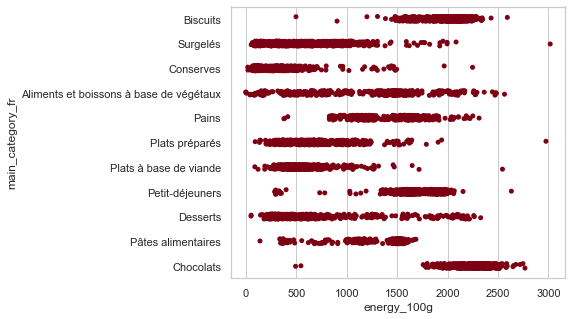

In [53]:
ax = sns.stripplot(y="main_category_fr", x="energy_100g", data=food_france_main_cat, color='#7d0013', orient = 'h')
plt.show()

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('energy_100g ~ C(main_category_fr)', data=food_france_main_cat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 

,sum_sq,df,F,PR(>F)
C(main_category_fr),2.718139e+09,10.0,2552.79452,0.0
Residual,7.250019e+08,6809.0,NaN,NaN


In [55]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=food_france_main_cat, res_var='energy_100g', anova_model='energy_100g ~ C(main_category_fr)')
res.anova_summary
# output (ANOVA F and p value)


# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results."""

,df,sum_sq,mean_sq,F,PR(>F)
C(main_category_fr),10.0,2.718139e+09,2.718139e+08,2552.79452,0.0
Residual,6809.0,7.250019e+08,1.064770e+05,NaN,NaN


le POC

In [56]:
category = pd.read_csv(r'C:\Users\Hugues\Box Sync\jupyter\cours\OCR_P3\category.csv',  delimiter=';') #import d'une table permettant de réduire les category en 3 items 

In [57]:
category.describe ( include = 'all')

,Unnamed: 0,main_category_fr,Unnamed: 2,Unnamed: 3
count,476,476.000000,0.0,476
unique,476,NaN,NaN,4
top,Conserves,NaN,NaN,collation
freq,1,NaN,NaN,360
mean,NaN,35.640756,NaN,NaN
std,NaN,106.574013,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,9.000000,NaN,NaN


In [58]:
category.head(50)

,Unnamed: 0,main_category_fr,Unnamed: 2,Unnamed: 3
0,Conserves,721,NaN,plat
1,Biscuits,697,NaN,dessert
2,Surgelés,692,NaN,plat
3,Petit-déjeuners,681,NaN,collation
4,Desserts,635,NaN,dessert
5,Chocolats,603,NaN,collation
6,Plats préparés,597,NaN,plat
7,Pâtes alimentaires,592,NaN,plat
8,Plats à base de viande,525,NaN,plat
9,Pains,524,NaN,non


In [59]:
result = pd.merge(food_france, category, left_on="main_category_fr", right_on="Unnamed: 0", how="left", sort=False ) 

In [60]:
result.head(5)

,product_name,generic_name,main_category_fr_x,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,total_nutriment,Unnamed: 0,main_category_fr_y,Unnamed: 2,Unnamed: 3
0,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,Sodas,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,0.010000,13.0,2.0,10.4,Sodas,109.0,NaN,non
1,Cakes Raisins,Pâtisseries aux raisins secs.,Gâteaux,1768.0,19.0,2.5,56.0,28.0,1.8,5.8,0.6500,0.255906,13.0,13.0,80.8,Gâteaux,330.0,NaN,dessert
2,Cakes aux Fruits,Pâtisseries aux fruits confits et aux raisins ...,Pâtisseries,1670.0,15.0,2.0,60.0,34.0,1.5,4.9,0.6000,0.236220,12.0,12.0,79.9,Pâtisseries,59.0,NaN,dessert
3,Financiers aux Amandes,Pâtisseries fondantes à la poudre d'amande.,Pâtisseries,1868.0,23.0,10.0,51.0,39.0,1.7,8.0,0.5500,0.216535,22.0,22.0,82.0,Pâtisseries,59.0,NaN,dessert
4,Fondants Citron,Pâtisseries fondantes à la poudre d’amande et ...,Pâtisseries,1896.0,24.0,10.0,50.0,37.0,2.5,8.1,0.7800,0.307087,22.0,22.0,82.1,Pâtisseries,59.0,NaN,dessert


In [61]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17106 entries, 0 to 17105
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             17106 non-null  object 
 1   generic_name             17106 non-null  object 
 2   main_category_fr_x       17106 non-null  object 
 3   energy_100g              17106 non-null  float64
 4   fat_100g                 17106 non-null  float64
 5   saturated-fat_100g       17106 non-null  float64
 6   carbohydrates_100g       17106 non-null  float64
 7   sugars_100g              17106 non-null  float64
 8   fiber_100g               17106 non-null  float64
 9   proteins_100g            17106 non-null  float64
 10  salt_100g                17106 non-null  float64
 11  sodium_100g              17106 non-null  float64
 12  nutrition-score-fr_100g  17106 non-null  float64
 13  nutrition-score-uk_100g  17106 non-null  float64
 14  total_nutriment       

In [62]:
result.drop('main_category_fr_y', axis = 1 , inplace= True)
result.drop('Unnamed: 0', axis = 1 , inplace= True)
result.drop('Unnamed: 2', axis = 1 , inplace= True)
result.rename(columns={"main_category_fr_x": "main_category_fr", "Unnamed: 3": "element_repas"} , inplace= True)


In [63]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17106 entries, 0 to 17105
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             17106 non-null  object 
 1   generic_name             17106 non-null  object 
 2   main_category_fr         17106 non-null  object 
 3   energy_100g              17106 non-null  float64
 4   fat_100g                 17106 non-null  float64
 5   saturated-fat_100g       17106 non-null  float64
 6   carbohydrates_100g       17106 non-null  float64
 7   sugars_100g              17106 non-null  float64
 8   fiber_100g               17106 non-null  float64
 9   proteins_100g            17106 non-null  float64
 10  salt_100g                17106 non-null  float64
 11  sodium_100g              17106 non-null  float64
 12  nutrition-score-fr_100g  17106 non-null  float64
 13  nutrition-score-uk_100g  17106 non-null  float64
 14  total_nutriment       

In [64]:
food_france = result

In [65]:
food_france.describe( include = 'all')

,product_name,generic_name,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,total_nutriment,element_repas
count,17106,17106,17106,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17104
unique,15479,13133,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Macédoine de légumes,Pâtes alimentaires au blé dur de qualité supér...,Conserves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plat
freq,17,162,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6318
mean,NaN,NaN,NaN,1073.906291,11.508956,4.468424,30.106627,12.523249,2.608168,7.157846,0.898990,0.353932,6.532620,6.140594,48.773429,NaN
std,NaN,NaN,NaN,756.307464,14.939675,7.055529,27.168753,17.312073,3.660363,6.594082,3.462139,1.363047,8.903209,9.157892,32.417480,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000,0.000000,NaN
25%,NaN,NaN,NaN,390.000000,1.300000,0.300000,6.200000,1.300000,0.500000,2.200000,0.070000,0.027559,0.000000,-1.000000,18.700000,NaN
50%,NaN,NaN,NaN,971.000000,5.500000,1.500000,18.000000,4.200000,1.800000,6.000000,0.508000,0.200000,5.000000,3.000000,41.300000,NaN
75%,NaN,NaN,NaN,1640.000000,17.500000,5.600000,56.300000,16.600000,3.400000,9.800000,1.100000,0.433071,13.000000,14.000000,84.800000,NaN


In [66]:
print ( food_france['element_repas'].unique() ) #

['non' 'dessert' 'plat' 'collation' nan]


In [67]:
(food_france['element_repas']=='plat').describe()

count     17106
unique        2
top       False
freq      10788
Name: element_repas, dtype: object

In [85]:
plat = [ ] 
collation = []
dessert = []
while ( len(plat) <4  or len(dessert) <2 or len (collation)<1):
    alea = random.randint(0, 16965)
    ingredient = food_france.loc[alea, 'element_repas']
    if ingredient == 'plat' :
        plat.append(alea) 
    if ingredient == 'collation':
        collation.append(alea)
    if ingredient == 'dessert':
        dessert.append(alea)
portion_plat = 150 #portion moyenne pour chaque plat en gramme
portion = 100 #portion moyenne pour chaque desset ou collation en gramme
print ("Menu pour la journée : le chef vous propose " )
print ('\n Déjeuner')
print (portion_plat ,"grammes", food_france.loc[plat[0], 'product_name'] ) 
print (portion_plat ,"grammes",food_france.loc[plat[1], 'product_name'] )
print (portion ,"grammes",food_france.loc[dessert[0], 'product_name'] ) 
print ('\n Collation')
print (portion ,"grammes",food_france.loc[collation[0], 'product_name'])  
print ('\n Diner')
print (portion_plat ,"grammes",food_france.loc[plat[2], 'product_name'] )
print (portion_plat ,"grammes",food_france.loc[plat[3], 'product_name'] )
print (portion ,"grammes",food_france.loc[dessert[1], 'product_name'] )
calorie = 0 
# rappel energy_100g est enregistré en Kilo Joule : il faut diviser par 4.168 pour avoir les K cal ( source internet)
for i in range(4) :
    calorie = calorie + food_france.loc[plat[i] ,'energy_100g']*portion_plat / 100 / 4.168
for i in range(2) :
    calorie = calorie + food_france.loc[dessert[i], 'energy_100g']*portion / 100 / 4.168
calorie = calorie +  food_france.loc[collation[0], 'energy_100g']*portion / 100 /4.168 
print ('mais ..... ')
print ('\n\n\n')
print (" le diététicien calcule un total de : ", np.around(calorie) ,' calories')
    
print ('Déjeuner')
print (food_france.loc[plat[0], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[0] ,'energy_100g']*portion_plat / 100 / 4.168))
print (food_france.loc[plat[1], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[1], 'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[dessert[0], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[dessert[0], 'energy_100g']*portion / 100/ 4.168))
print ('\n Collation')
print (food_france.loc[collation[0], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[collation[0], 'energy_100g']*portion / 100/ 4.168))
print ('\n Diner')
print (food_france.loc[plat[2], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[2] ,'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[plat[3], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[3], 'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[dessert[1], 'product_name'], ' / calories en milliers : ',np.around(food_france.loc[dessert[1], 'energy_100g']*portion / 100/ 4.168))

print (' \n Apports nutionnels conseillés\nen Kcal                 Sédentaires Activité moyenne 	    Activité importante \nFemmes de 20 à 40 ans 	1 900  	    2 200  	            2 400\nFemmes de 41 à 50 ans 	1 800  	    2 000  	            2 300\n\nHommes de 20 à 40 ans 	2 400       2 700 	            3 080\nHommes de 41 à 50 ans 	2 250       2 500 	            2 900\n\n\nSource https://onmangequoi.lamutuellegenerale.fr/besoins-alimentaires/adultes/entre-18-et-50-ans/quels-apports-nutritionnels-conseilles-\nAfssa. Apports nutritionnels conseillés pour la population française ') 
print ('\n ingrédient détail')
print ('Déjeuner')
print (food_france.loc[plat[0], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[0] ,'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[plat[1], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[1], 'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[dessert[0], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[dessert[0], 'energy_100g']*portion / 100/ 4.168))
print ('\n Collation')
print (food_france.loc[collation[0], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[collation[0], 'energy_100g']*portion / 100/ 4.168))
print ('\n Diner')
print (food_france.loc[plat[2], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[2] ,'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[plat[3], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[plat[3], 'energy_100g']*portion_plat / 100/ 4.168))
print (food_france.loc[dessert[1], 'generic_name'], ' / calories en milliers : ',np.around(food_france.loc[dessert[1], 'energy_100g']*portion / 100/ 4.168))

Menu pour la journée : le chef vous propose 

 Déjeuner
150 grammes Hamburger
150 grammes Coquillettes
100 grammes Gaufrettes Ciboulette Ail

 Collation
100 grammes Stylesse Fruits rouges

 Diner
150 grammes Lasagnes chèvre tomates
150 grammes Truite fumée d'Aquitaine
100 grammes Brownie Chocolat noisettes Carrefour
mais ..... 




 le diététicien calcule un total de :  2749.0  calories
Déjeuner
Hamburger  / calories en milliers :  367.0
Coquillettes  / calories en milliers :  551.0
Gaufrettes Ciboulette Ail  / calories en milliers :  555.0

 Collation
Stylesse Fruits rouges  / calories en milliers :  377.0

 Diner
Lasagnes chèvre tomates  / calories en milliers :  230.0
Truite fumée d'Aquitaine  / calories en milliers :  205.0
Brownie Chocolat noisettes Carrefour  / calories en milliers :  464.0
 
 Apports nutionnels conseillés
en Kcal                 Sédentaires Activité moyenne 	    Activité importante 
Femmes de 20 à 40 ans 	1 900  	    2 200  	            2 400
Femmes de 41 à 50 a

In [69]:
# sns.histplot(data=food_france, x="carbo_discret", y = 'energy_100g')

In [70]:
# sns.barplot(data=food_france, x="carbo_discret", y = 'energy_100g')

In [72]:
# sns.displot(food_france, x="carbo_discret", discrete=True)